In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Data Analysis\New folder\Netflix_Movie_data_Analysis\mymoviedb.csv",lineterminator='\n')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
None


In [58]:
data.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [59]:
data['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [60]:
data.duplicated().sum()

np.int64(0)

In [61]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


- Exploration Summary 
- We have a dataframe consisting of 9827 rowa and 9 columns .
- Our dataset looks a bit tidy with no NAN nor duplicated values. 
- Release_Date column needs to be casted into date time and to extract only the year value .
- Overview , Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them. 
- There is noticable puyliers in Popularity column 
- Vote_Average better be categorized for proper analysis . 
- Genre column has comma separated values and white spaces that needs to be handled and casted into category . Exploration summary 

In [129]:
# change the datatype of Release_Date to datetime

data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [130]:
data['Release_Date'].dtypes

dtype('<M8[ns]')

In [131]:
data['Release_Date'] = data['Release_Date'].dt.year

In [132]:
data['Release_Date'].dtypes

dtype('int32')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [133]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [67]:
data.drop(['Overview','Original_Language','Poster_Url'],axis=1,inplace=True)
data.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [68]:
data['Vote_Average']

0       8.3
1       8.1
2       6.3
3       7.7
4       7.0
       ... 
9822    7.6
9823    3.5
9824    5.0
9825    6.7
9826    7.8
Name: Vote_Average, Length: 9827, dtype: float64

In [93]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [70]:
data.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [71]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average column 

We would cut the Vote_Average values and make 4 categories: popular, average, below_avg,not_popular to describe it more using catigorize_col() function provided above 

In [116]:
def categorize_col(data,col,labels):
    edges = [data[col].describe()['min'],
             data[col].describe()['25%'],
             data[col].describe()['50%'],
             data[col].describe()['75%'],
             data[col].describe()['max']]
             
    data[col] = pd.cut(data[col], edges ,labels = labels , duplicates = 'drop')
    return data

In [117]:
labels = ['not_popular','below_avg','average','popular']
categorize_col(data,'Vote_Average',labels)
data['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [118]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [119]:
data['Vote_Average'].value_counts()

Vote_Average
not_popular    6999
below_avg      6581
average        6432
popular        5540
Name: count, dtype: int64

In [120]:
data.dropna(inplace=True)
data.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

We'd split genres into a list and then explode our dataframe to hace only one genre per row for each movie

In [121]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)

In [122]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [102]:
data['Genre'] = data['Genre'].astype('category')
data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25793 non-null  object  
 1   Title              25793 non-null  object  
 2   Overview           25793 non-null  object  
 3   Popularity         25793 non-null  float64 
 4   Vote_Count         25793 non-null  int64   
 5   Vote_Average       25793 non-null  float64 
 6   Original_Language  25793 non-null  object  
 7   Genre              25793 non-null  category
 8   Poster_Url         25793 non-null  object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 1.6+ MB


In [104]:
data.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                  19
Poster_Url           9827
dtype: int64

Data Visualization

In [106]:
sns.set_style('whitegrid')

Que 1 : What is the most frequnent genre of movies released on Nteflix ? 

In [107]:
data['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre column distribution')

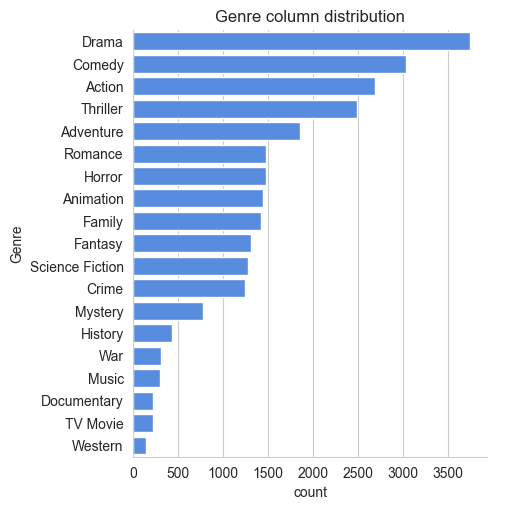

In [108]:
sns.catplot(y='Genre',data= data,kind='count',order=data['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre column distribution')

Que 2 : Which has the highest votes in vote avg column ? 

Text(0.5, 1.0, 'Votes Distribution')

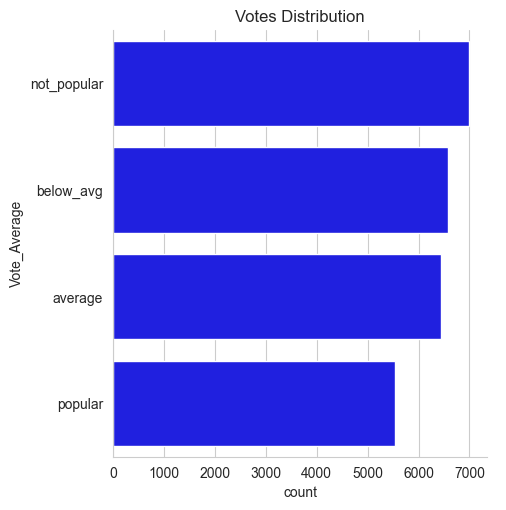

In [123]:
sns.catplot(y='Vote_Average',data=data,kind='count',order=data['Vote_Average'].value_counts().index,color='blue')
plt.title("Votes Distribution")

Que 3 : What movie got the highest popularity? what's its genre? 

In [125]:
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


Que 4 : What movie got the lowest popularity ? What's its genre? 

In [126]:
data[data['Popularity'] == data['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
25546,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25547,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25548,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25549,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25550,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25551,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


Que 5 : Which movie has the most filmmed movies ? 

Text(0.5, 1.0, 'Release Date column distribution')

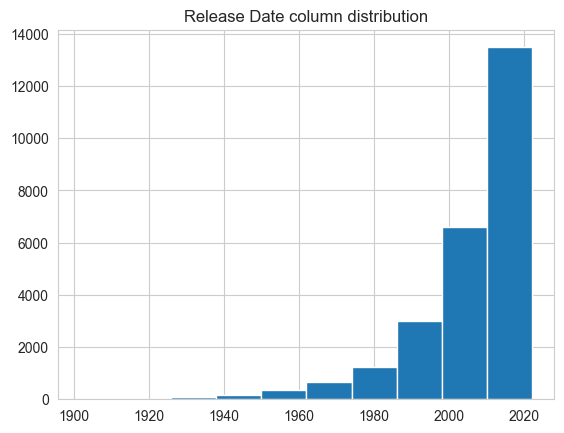

In [134]:
data['Release_Date'].hist()
plt.title('Release Date column distribution')